### I tried to check whether there is something wrong with my Perceptron model..
<br> So I replaced the data with rather simple features.. Iris Data
<br> Iris data contains only 4 features when mushroom data has 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing


In [2]:
class Perceptron:
    def __init__(self,eta = 0.1, epochs = 10, random_seed=3):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    def fit(self, X, y ,X0= False):
        if X0 == False:
            X = np.c_[np.ones(len(y)), X]
        np.random.seed(self.random_seed)
        self.w = np.random.random(X.shape[1])
        
        self.maxy,self.miny = y.max(),y.min()
        self.cost_=[] #인스턴스 변수로 사용하려면 self.을 붙여야 한다. 변수를 리스트로 초기화.
        self.w_=np.array([self.w]) #self.w_는 변화된 w를 또 하나의 벡터로 변환해서 w의 변화를 보는 것.
        
        for i in range(self.epochs):
            self.errors = 0
            for xi,yi in zip(X,y):
                yhat = self.activate(xi)
                delta = self.eta*(yi-yhat)*xi
                self.w = self.w +delta
                if yi!=yhat:
                    self.errors += 1
            self.cost_.append(self.errors)
            self.w_ = np.vstack([self.w_,self.w]) #w_에 w 추가.
        return self.errors
    
    def net_input(self,X):
        if X.shape[0] == self.w.shape[0]: #편향값이 1이 아닌 경우를 검사하기 위해
            z = np.dot(self.w.T, X)
        else:
            z = np.dot(X, self.w[1:])+self.w[0]
        return z
    
    def activate(self,X):
        mid = (self.maxy + self.miny)/2
        return np.where(self.net_input(X)>mid, self.maxy, self.miny)
    
    def predict(self,X):
        return self.activate(X) #이미 계산된 가중치로 새로운 입력 특성에 대해 예측하는 함수. 
                

In [9]:
class feature_detector:
    def read(self,url):
        with open(url) as mushroom:
            self.raw_data = np.array([i.split(',') for i in mushroom.read().split('\n')])
        return self.raw_data
    
    def Transform(self,column):
        le = preprocessing.LabelEncoder()
        set_col = list(set(column))
        le.fit(column)
        self.array = le.transform(column)
        set_array = le.transform(set_col)
        self.col_dict = dict(zip(set_col, set_array))
        return (self.array, self.col_dict)
    
    def concatenate(self):
        target, self.target_label = self.Transform(self.raw_data[:,0]) #target 
        self.target = target.reshape(self.raw_data.shape[0],1)
        self.feature_type = []

        col1, col1_dict = self.Transform(self.raw_data[:,1])
        self.data = np.array(col1).reshape(self.raw_data.shape[0],1)

        for n in range(2,self.raw_data.shape[1]):
            column = self.raw_data[:,n]
            array, dictionary = self.Transform(column)
            self.data = np.hstack([self.data,np.array(array).reshape(self.raw_data.shape[0],1)])
            self.feature_type.append(dictionary)
        
        return (self.data, self.target, self.feature_type, self.target_label)

In [4]:
class OneHotEncoding:
    def diagonal_matrix(self,column):
        num = np.unique(column).shape[0]
        array = np.eye(num)[column]
        return(array)

    def encoding(self, x):
        col1 = self.diagonal_matrix(x[:,0])
        for n in range(1, x.shape[1]):
            column = x[:,n]
            col1 = np.hstack([col1,self.diagonal_matrix(column)])    
        return(col1)

In [65]:
import os 
from sklearn.model_selection import train_test_split
iris = feature_detector()
data = iris.read(os.getcwd().replace('\\','/')+'/iris_data.txt')
X = data[:,:4].astype('float')
y, target_label = iris.Transform(data[:,-1])
y = y.astype('float')

### Simple Perceptron can only classify data with 2 labels, so I extracted data with only 2 classes

In [76]:
data = np.array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa'],
       ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa'],
       ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa'],
       ['5.1', '3.7', '1.5', '0.4', 'Iris-setosa'],
       ['4.6', '3.6', '1.0', '0.2', 'Iris-setosa'],
       ['5.1', '3.3', '1.7', '0.5', 'Iris-setosa'],
       ['4.8', '3.4', '1.9', '0.2', 'Iris-setosa'],
       ['5.0', '3.0', '1.6', '0.2', 'Iris-setosa'],
       ['5.0', '3.4', '1.6', '0.4', 'Iris-setosa'],
       ['5.2', '3.5', '1.5', '0.2', 'Iris-setosa'],
       ['5.2', '3.4', '1.4', '0.2', 'Iris-setosa'],
       ['4.7', '3.2', '1.6', '0.2', 'Iris-setosa'],
       ['4.8', '3.1', '1.6', '0.2', 'Iris-setosa'],
       ['5.4', '3.4', '1.5', '0.4', 'Iris-setosa'],
       ['5.2', '4.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.5', '4.2', '1.4', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['5.0', '3.2', '1.2', '0.2', 'Iris-setosa'],
       ['5.5', '3.5', '1.3', '0.2', 'Iris-setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa'],
       ['4.4', '3.0', '1.3', '0.2', 'Iris-setosa'],
       ['5.1', '3.4', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.5', '1.3', '0.3', 'Iris-setosa'],
       ['4.5', '2.3', '1.3', '0.3', 'Iris-setosa'],
       ['4.4', '3.2', '1.3', '0.2', 'Iris-setosa'],
       ['5.0', '3.5', '1.6', '0.6', 'Iris-setosa'],
       ['5.1', '3.8', '1.9', '0.4', 'Iris-setosa'],
       ['4.8', '3.0', '1.4', '0.3', 'Iris-setosa'],
       ['5.1', '3.8', '1.6', '0.2', 'Iris-setosa'],
       ['4.6', '3.2', '1.4', '0.2', 'Iris-setosa'],
       ['5.3', '3.7', '1.5', '0.2', 'Iris-setosa'],
       ['5.0', '3.3', '1.4', '0.2', 'Iris-setosa'],
       ['7.0', '3.2', '4.7', '1.4', 'Iris-versicolor'],
       ['6.4', '3.2', '4.5', '1.5', 'Iris-versicolor'],
       ['6.9', '3.1', '4.9', '1.5', 'Iris-versicolor'],
       ['5.5', '2.3', '4.0', '1.3', 'Iris-versicolor'],
       ['6.5', '2.8', '4.6', '1.5', 'Iris-versicolor'],
       ['5.7', '2.8', '4.5', '1.3', 'Iris-versicolor'],
       ['6.3', '3.3', '4.7', '1.6', 'Iris-versicolor'],
       ['4.9', '2.4', '3.3', '1.0', 'Iris-versicolor'],
       ['6.6', '2.9', '4.6', '1.3', 'Iris-versicolor'],
       ['5.2', '2.7', '3.9', '1.4', 'Iris-versicolor'],
       ['5.0', '2.0', '3.5', '1.0', 'Iris-versicolor'],
       ['5.9', '3.0', '4.2', '1.5', 'Iris-versicolor'],
       ['6.0', '2.2', '4.0', '1.0', 'Iris-versicolor'],
       ['6.1', '2.9', '4.7', '1.4', 'Iris-versicolor'],
       ['5.6', '2.9', '3.6', '1.3', 'Iris-versicolor'],
       ['6.7', '3.1', '4.4', '1.4', 'Iris-versicolor'],
       ['5.6', '3.0', '4.5', '1.5', 'Iris-versicolor'],
       ['5.8', '2.7', '4.1', '1.0', 'Iris-versicolor'],
       ['6.2', '2.2', '4.5', '1.5', 'Iris-versicolor'],
       ['5.6', '2.5', '3.9', '1.1', 'Iris-versicolor'],
       ['5.9', '3.2', '4.8', '1.8', 'Iris-versicolor'],
       ['6.1', '2.8', '4.0', '1.3', 'Iris-versicolor'],
       ['6.3', '2.5', '4.9', '1.5', 'Iris-versicolor'],
       ['6.1', '2.8', '4.7', '1.2', 'Iris-versicolor'],
       ['6.4', '2.9', '4.3', '1.3', 'Iris-versicolor'],
       ['6.6', '3.0', '4.4', '1.4', 'Iris-versicolor'],
       ['6.8', '2.8', '4.8', '1.4', 'Iris-versicolor'],
       ['6.7', '3.0', '5.0', '1.7', 'Iris-versicolor'],
       ['6.0', '2.9', '4.5', '1.5', 'Iris-versicolor'],
       ['5.7', '2.6', '3.5', '1.0', 'Iris-versicolor'],
       ['5.5', '2.4', '3.8', '1.1', 'Iris-versicolor'],
       ['5.5', '2.4', '3.7', '1.0', 'Iris-versicolor'],
       ['5.8', '2.7', '3.9', '1.2', 'Iris-versicolor'],
       ['6.0', '2.7', '5.1', '1.6', 'Iris-versicolor'],
       ['5.4', '3.0', '4.5', '1.5', 'Iris-versicolor'],
       ['6.0', '3.4', '4.5', '1.6', 'Iris-versicolor'],
       ['6.7', '3.1', '4.7', '1.5', 'Iris-versicolor'],
       ['6.3', '2.3', '4.4', '1.3', 'Iris-versicolor'],
       ['5.6', '3.0', '4.1', '1.3', 'Iris-versicolor'],
       ['5.5', '2.5', '4.0', '1.3', 'Iris-versicolor'],
       ['5.5', '2.6', '4.4', '1.2', 'Iris-versicolor'],
       ['6.1', '3.0', '4.6', '1.4', 'Iris-versicolor'],
       ['5.8', '2.6', '4.0', '1.2', 'Iris-versicolor'],
       ['5.0', '2.3', '3.3', '1.0', 'Iris-versicolor'],
       ['5.6', '2.7', '4.2', '1.3', 'Iris-versicolor'],
       ['5.7', '3.0', '4.2', '1.2', 'Iris-versicolor'],
       ['5.7', '2.9', '4.2', '1.3', 'Iris-versicolor'],
       ['6.2', '2.9', '4.3', '1.3', 'Iris-versicolor'],
       ['5.1', '2.5', '3.0', '1.1', 'Iris-versicolor'],
       ['5.7', '2.8', '4.1', '1.3', 'Iris-versicolor']])

In [77]:
X = data[:,:4].astype('float')
y, target_label = iris.Transform(data[:,-1])
y = y.astype('float')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

Text(0,0.5,'Misclassified Samples')

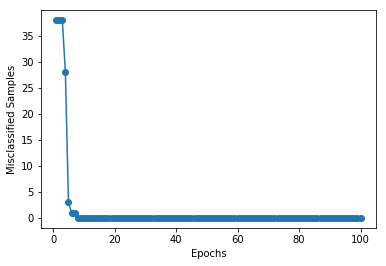

In [79]:
ppn = Perceptron(eta = 0.001,epochs = 100)
ppn.fit(X_train, y_train)
plt.plot(range(1,len(ppn.cost_)+1),ppn.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassified Samples')

In [80]:
np.mean(ppn.predict(X_test) == y_test)

1.0